### IMPORT REQUIRED LIBRARIES

In [87]:
%matplotlib inline
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### READ DATASET

In [2]:
df = pd.read_csv('Video_games_esrb_rating.csv')
df.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


In [4]:
df.shape

(1895, 34)

#### DO SOME ANALISYS ON THE DATA

In [65]:
df.count()

title                       1895
console                     1895
alcohol_reference           1895
animated_blood              1895
blood                       1895
blood_and_gore              1895
cartoon_violence            1895
crude_humor                 1895
drug_reference              1895
fantasy_violence            1895
intense_violence            1895
language                    1895
lyrics                      1895
mature_humor                1895
mild_blood                  1895
mild_cartoon_violence       1895
mild_fantasy_violence       1895
mild_language               1895
mild_lyrics                 1895
mild_suggestive_themes      1895
mild_violence               1895
no_descriptors              1895
nudity                      1895
partial_nudity              1895
sexual_content              1895
sexual_themes               1895
simulated_gambling          1895
strong_janguage             1895
strong_sexual_content       1895
suggestive_themes           1895
use_of_alc

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     1895 non-null   object
 1   console                   1895 non-null   int64 
 2   alcohol_reference         1895 non-null   int64 
 3   animated_blood            1895 non-null   int64 
 4   blood                     1895 non-null   int64 
 5   blood_and_gore            1895 non-null   int64 
 6   cartoon_violence          1895 non-null   int64 
 7   crude_humor               1895 non-null   int64 
 8   drug_reference            1895 non-null   int64 
 9   fantasy_violence          1895 non-null   int64 
 10  intense_violence          1895 non-null   int64 
 11  language                  1895 non-null   int64 
 12  lyrics                    1895 non-null   int64 
 13  mature_humor              1895 non-null   int64 
 14  mild_blood              

In [77]:
pd.unique(df['esrb_rating'])

array(['E', 'ET', 'M', 'T'], dtype=object)

#### SUMMARIZE DATA TO PLOT GAMES COUNT BY RATING

In [78]:
summ_data = df.groupby('esrb_rating').agg({'title':'count'})
summ_data.head(10)

,title
esrb_rating,
E,416
ET,403
M,387
T,689


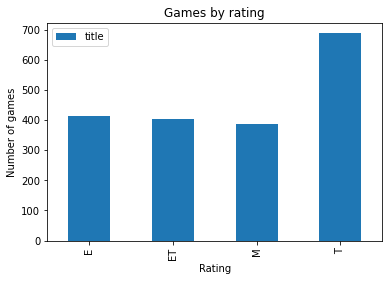

In [82]:
summ_data.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Number of games')
plt.title('Games by rating')
plt.show()

### SPLIT DATA INTO FEATURES AND LABELS

We eliminate first column too since we don´t need the games names

In [15]:
X = df[df.columns[1:-1]]
X.shape

(1895, 32)

In [16]:
y = df[df.columns[-1]]
y.shape

(1895,)

### SPLIT DATA INTO TRAIN AND TEST SETS

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=10)

In [60]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1326, 32)
(569, 32)
(1326,)
(569,)


#### WE CAN ALSO USE THE TEST DATA SET PROVIDED

In [136]:
test_df = pd.read_csv('test_esrb.csv')
test_df.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Still Time,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,T
1,Surf World Series,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
2,The Metronomicon: Slay the Dance Floor,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,T
3,Windjammers,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
4,Rock of Ages 2: Bigger and Boulder,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,ET


In [137]:
X_test_df = test_df[test_df.columns[1:-1]]
X_test_df.head()

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [138]:
y_test_df = test_df[test_df.columns[-1]]
y_test_df.head()

0     T
1     E
2     T
3     E
4    ET
Name: esrb_rating, dtype: object

In [140]:
print(X_test_df.shape)
print(y_test_df.shape)

(500, 32)
(500,)


### CREATE OUR MODEL

In [152]:
rfc = RandomForestClassifier(n_estimators=30,random_state=10, verbose=5, n_jobs=-1)

### TRAIN THE MODEL

In [153]:
rfc = rfc.fit(X, y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 30building tree 2 of 30building tree 3 of 30

building tree 4 of 30

building tree 5 of 30building tree 6 of 30building tree 7 of 30building tree 8 of 30



building tree 9 of 30building tree 10 of 30building tree 11 of 30


building tree 12 of 30
building tree 13 of 30building tree 14 of 30

building tree 15 of 30
building tree 16 of 30
building tree 17 of 30
building tree 18 of 30
building tree 19 of 30building tree 20 of 30

building tree 21 of 30
building tree 22 of 30
building tree 23 of 30building tree 24 of 30

building tree 25 of 30building tree 26 of 30

building tree 27 of 30building tree 28 of 30

building tree 29 of 30building tree 30 of 30



[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished


### CHECK MODEL´S ACCURACY

In [154]:
y_pred_test = rfc.predict(X_test_df)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  22 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.0s finished


In [155]:
accuracy = accuracy_score(y_test_df,y_pred_test)
accuracy

0.844

#### CONFUSION MATRIX

In [156]:
confusion_matrix(y_test_df, y_pred_test)

array([[ 96,   3,   0,   1],
       [  5, 106,   0,  15],
       [  0,   0,  60,  30],
       [  2,  15,   7, 160]], dtype=int64)

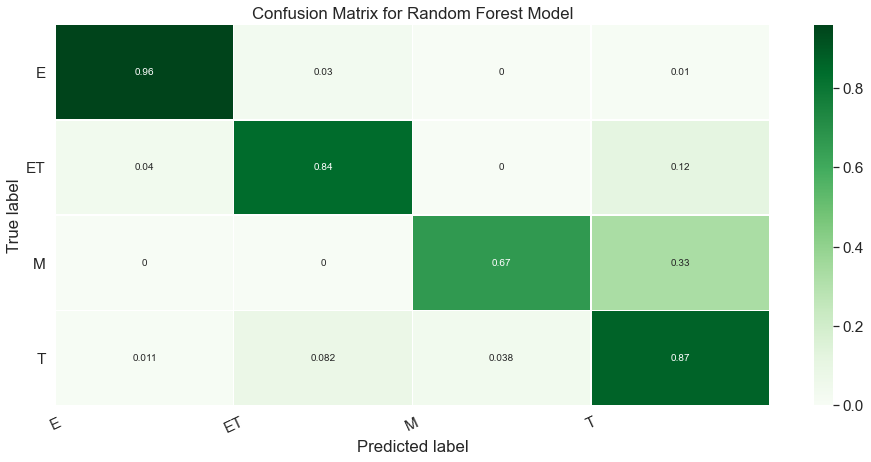

In [157]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test_df, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['E', 'ET', 'M', 
               'T']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

Text(152.5, 0.5, 'Predicted labels')

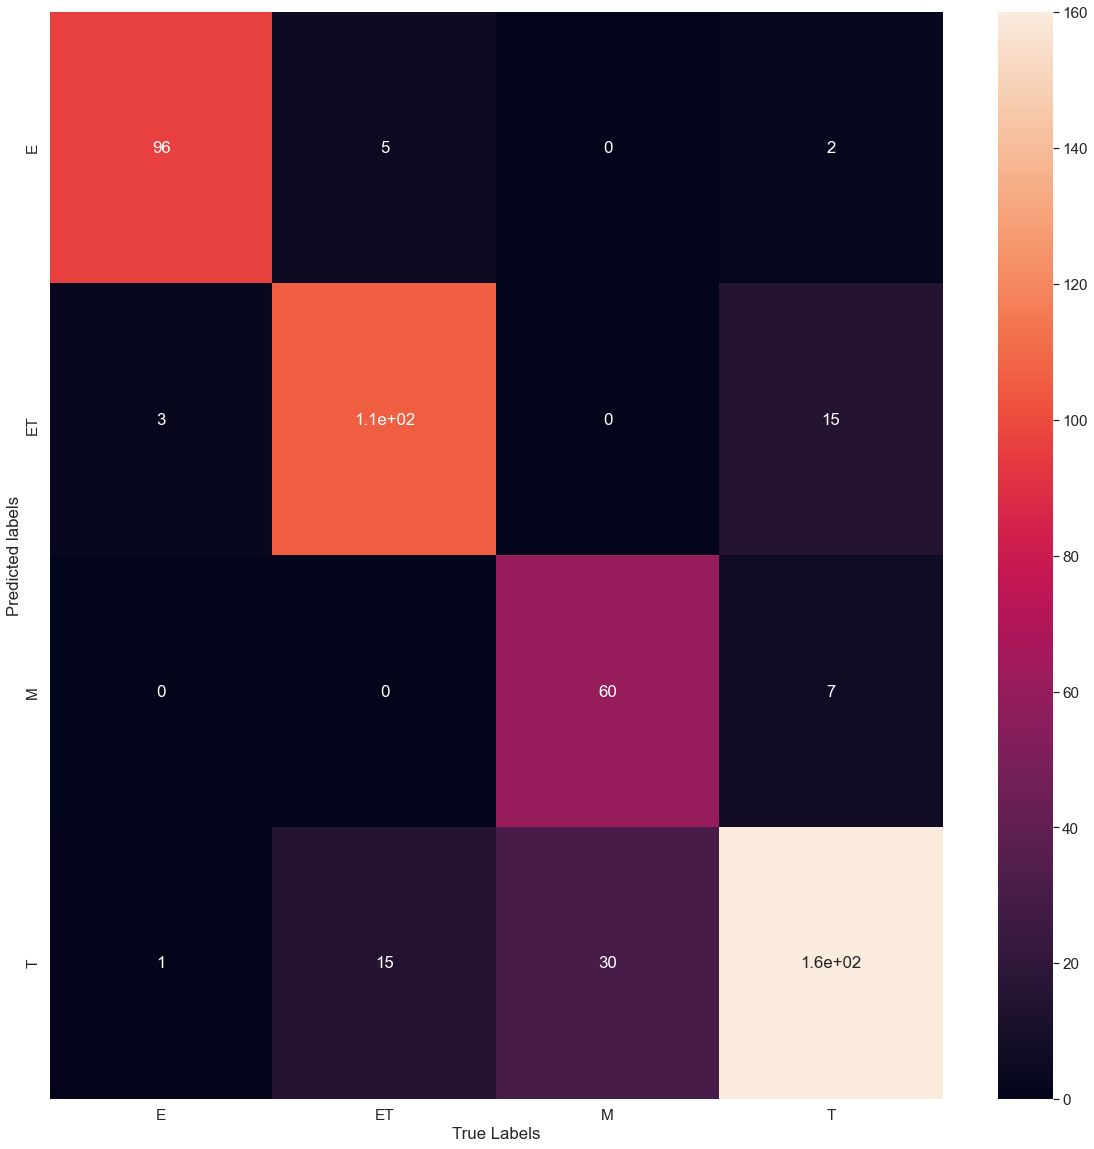

In [158]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(20,20))
mat = confusion_matrix(y_test_df, y_pred_test)
sns.heatmap(mat.T,annot = True, xticklabels=pd.unique(df['esrb_rating']), yticklabels=pd.unique(df['esrb_rating']))
plt.xlabel('True Labels')
plt.ylabel('Predicted labels')

### MAKE SOME PREDICTIONS

#### READ DATA TO BE PREDICTED

In [161]:
for_pred_data = pd.read_csv('Video_games_rating_my_games.csv')
for_pred_data.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
0,Mygame1,0,1,0,1,1,0,0,1,0,...,0,1,1,1,0,1,1,1,1,1
1,Mygame2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Mygame3,2,1,1,0,0,1,0,0,1,...,0,0,1,1,1,0,0,0,0,1


In [163]:
games_list = for_pred_data[for_pred_data.columns[0]]
games_list

0    Mygame1
1    Mygame2
2    Mygame3
Name: title, dtype: object

#### REMOVE FIRST COLUMN

In [164]:
for_pred_data.drop(['title'], axis=1, inplace=True)
for_pred_data.head()

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
0,0,1,0,1,1,0,0,1,0,1,...,0,1,1,1,0,1,1,1,1,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1,0,0,1,0,0,1,1,...,0,0,1,1,1,0,0,0,0,1


#### GET PREDICTIONS

In [171]:
for index, row in for_pred_data.iterrows():
    #print(for_pred_data.iloc[index].tolist())
    #print(np.array(for_pred_data.iloc[index].tolist()).reshape(1,32))
    print('Game: '+ games_list[index] + '. Rating: ' + rfc.predict(np.array(for_pred_data.iloc[index].tolist()).reshape(1,32)))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  22 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s


['Game: Mygame1. Rating: M']
['Game: Mygame2. Rating: T']
['Game: Mygame3. Rating: M']


[Parallel(n_jobs=8)]: Done  22 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  22 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.0s finished
